## Logistic回归
*** Date : 2019-2-28 ***

*** Author : wwt117@163.com ***

*** Source : 《 Machine Learning in Action 》(chapter 5)  -- Peter Harrington***

---

#### 1、梯度上升法
- **使用所有的样本点来更新模型参数**
- **伪代码**


```
    每个回归系数初始化为1
    重发R次：
        计算整个数据集梯度
        使用alpha * gradient更新回归系数的向量
        返回回归系数
```


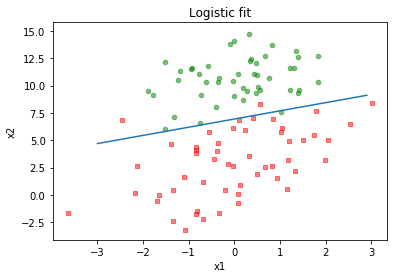

模型分类的准确率为 97.000000%


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    """读入数据函数
    
    返回值
    - - - - - -
    data : float
        样本的特征
    label : int 
        样本对应的标签
    
    """
    data = []
    label = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        line_list = line.strip().split() # 将一行中每一项分别保存成列表元素
        data.append([1.0,float(line_list[0]),float(line_list[1])]) # 这里的1是对应常数参数b
        label.append(int(line_list[2]))
    fr.close()
    return data,label


def visualize(weights):
    """绘图数据集与最佳拟合曲线
    
    输入参数
    - - - - - -
    weights : float
        Logistic模型参数
    
    """
    data,label = load_data()
    data_np = np.array(data)
    m,n = np.shape(data_np)
    xcord1 = []
    xcord2 = []
    ycord1 = []
    ycord2 = []
    for i in range(m):
        if int(label[i])==1:
            xcord1.append(data_np[i,1])
            ycord1.append(data_np[i,2])
        else:
            xcord2.append(data_np[i,1])
            ycord2.append(data_np[i,2])
    # 绘制数据集        
    plt.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)
    plt.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)        
    # 绘制拟合曲线
    x = np.arange(-3.0,3.0,0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    plt.plot(x,y.T)
    # 标注信息
    plt.title('Logistic fit')                                             
    plt.xlabel('x1'); plt.ylabel('x2')                                
    plt.show()                                                           



def sigmoid(z):
    """sigmoid函数
    
    输入参数
    - - - - - -
    z : float
        z是样本特征与模型参数的乘积和
            
    返回值
    - - - - - -
    g : float
        
    """
    g =  1.0 / (1 + np.exp(-z))
    return g


def grad_ascent(data,label):
    """梯度上升算法
    
    输入参数
    - - - - - - -
    data : float
        样本的特征
    label : int 
        样本对应的标签
        
    返回值
    - - - - - -
    weights: float
        Logistic模型的权重
        
    描述
    - - - - - -
    每次使用所有的样本点来更新模型参数
    
    """
    data_mat = np.mat(data)
    label_mat = np.mat(label).T
    m,n = np.shape(data_mat)
    alpha = 0.001
    iter_num = 1000
    weights = np.ones((n,1)) # 初始化权重 2*1
    for i in range(iter_num):
        z = data_mat * weights
        h = sigmoid(z)
        error = label_mat - h
        weights = weights + alpha * data_mat.T * error
    return weights
    

    
def predict(weights,data,label):
    """预测分类正确率
    
    输入参数
    - - - - - - -
    weights : float
        模型参数
    data : float
        样本特征
    label : int 
        样本对应的标签
    
    """
    data_mat = np.mat(data)
    label_mat = np.mat(label).T
    m,n = np.shape(data_mat)
    count = 0
    z = data_mat * weights
    for i in range(m):
        h = int(round(sigmoid(np.array(z)[i][0])))
        if h == label_mat[i]:
            count += 1
    accur = count / m * 100
    print("模型分类的准确率为 %f%%" % accur)
    
    
    
if __name__=='__main__':
    data,label = load_data()
    weights = grad_ascent(data,label)
    visualize(weights)
    predict(weights,data,label)

#### 2、随机梯度上升法
- ** 每次仅用一个样本点来更新模型参数 **
- ** 伪代码 **

```
    所有回归系数初始化为1
    对数据集中的每个样本
        计算该样本的梯度
        使用alpha * gradient更新回归系数值
    返回回归系数值
```

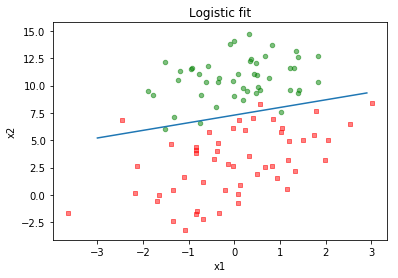

模型分类的准确率为 95.000000%


In [14]:
import random

def SGAscent(data,label,iter_num=150):
    """随机梯度上升算法
    
    输入参数
    - - - - - - -
    data : float
        样本的特征
    label : int 
        样本对应的标签
        
    返回值
    - - - - - -
    weights: float
        Logistic模型的权重
        
    描述
    - - - - - -
    每次仅用一个样本点来更新模型参数
        
    """
    data_mat = np.mat(data)
    label_mat = np.mat(label).T
    m,n = np.shape(data_mat)
    weights = np.ones((1,n))
    for j in range(iter_num):  
        data_ind = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01  # 当j<<max(i)时，alpha不是严格下降的。（严格下降需要避免）
            rand_ind = int(random.uniform(0,len(data_ind))) # 选取当前列表中随机第rand_ind位置的值
            z = data_mat[rand_ind] * weights.T
            h = sigmoid(z)
            error = label_mat[rand_ind] - h
            weights = weights + alpha * error * data_mat[rand_ind]
            del(data_ind[rand_ind])
    return weights.T

if __name__=='__main__':
    data,label = load_data()
    weights = SGAscent(data,label)
    visualize(weights)
    predict(weights,data,label)